In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../Data/data.csv',index_col='id')

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [6]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Woohoo!! No missing values

In [8]:
# Describe the dataframe statistically and Transpose for readability
df.describe().loc[['mean','std','min','25%','75%','max']].T

,mean,std,min,25%,75%,max
radius_mean,14.127292,3.524049,6.981000,11.700000,15.780000,28.11000
texture_mean,19.289649,4.301036,9.710000,16.170000,21.800000,39.28000
perimeter_mean,91.969033,24.298981,43.790000,75.170000,104.100000,188.50000
area_mean,654.889104,351.914129,143.500000,420.300000,782.700000,2501.00000
smoothness_mean,0.096360,0.014064,0.052630,0.086370,0.105300,0.16340
compactness_mean,0.104341,0.052813,0.019380,0.064920,0.130400,0.34540
concavity_mean,0.088799,0.079720,0.000000,0.029560,0.130700,0.42680
concave points_mean,0.048919,0.038803,0.000000,0.020310,0.074000,0.20120
symmetry_mean,0.181162,0.027414,0.106000,0.161900,0.195700,0.30400
fractal_dimension_mean,0.062798,0.007060,0.049960,0.057700,0.066120,0.09744


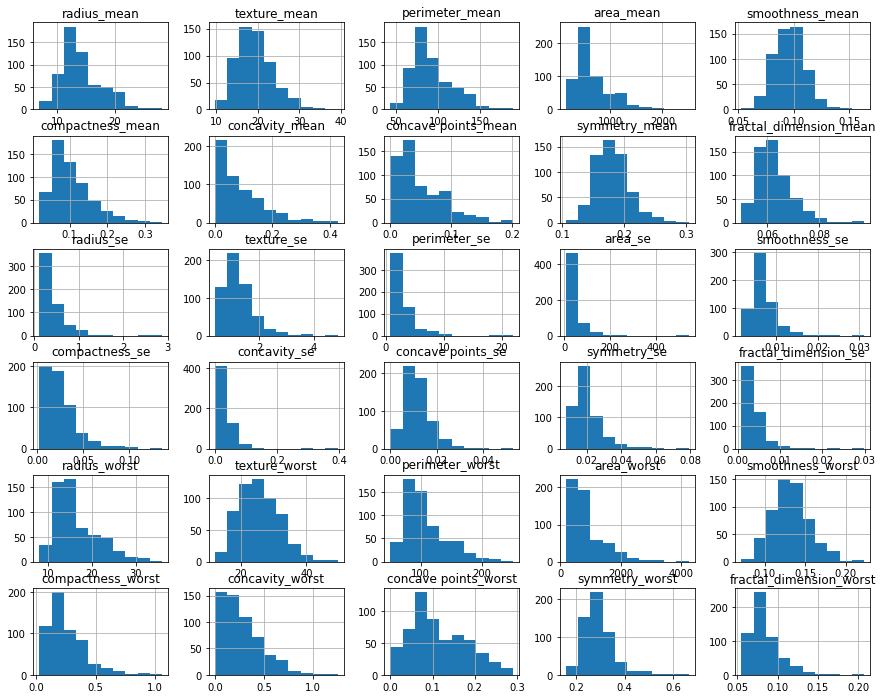

In [9]:
_=df.hist(figsize=(15,12))

In [10]:
y=df.diagnosis
x=df.drop('diagnosis',axis=1)

In [11]:
data = x
data_norm = (data - data.mean()) / data.std()

In [12]:
data = pd.concat([y, data_norm.iloc[:,0:10]], axis=1)

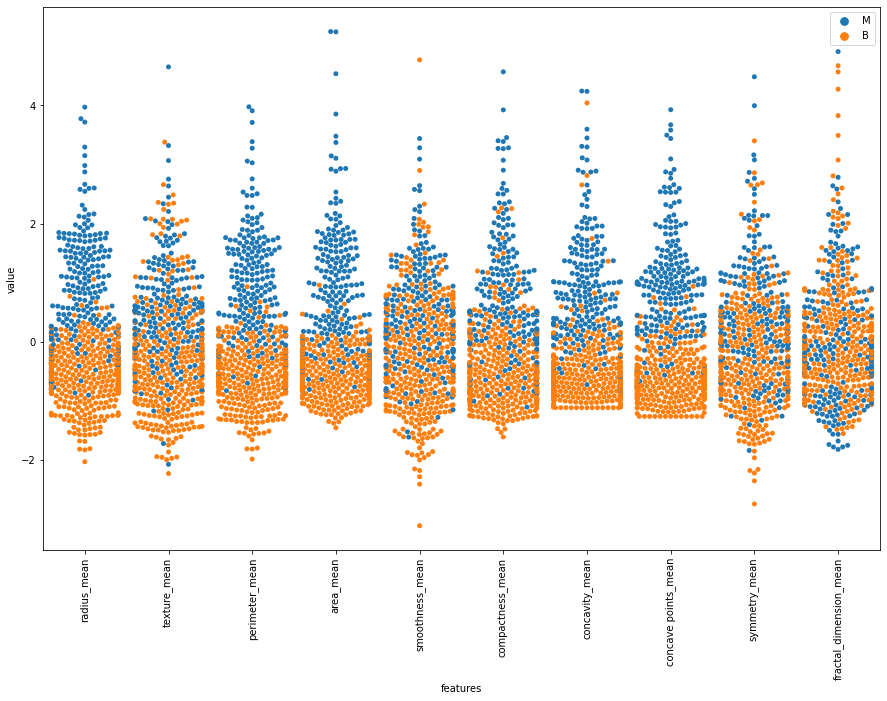

In [13]:
data = x
data_norm = (data - data.mean()) / data.std()

data = pd.concat([y, data_norm.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
_=plt.xticks(rotation=90)
_=plt.legend(loc='best')

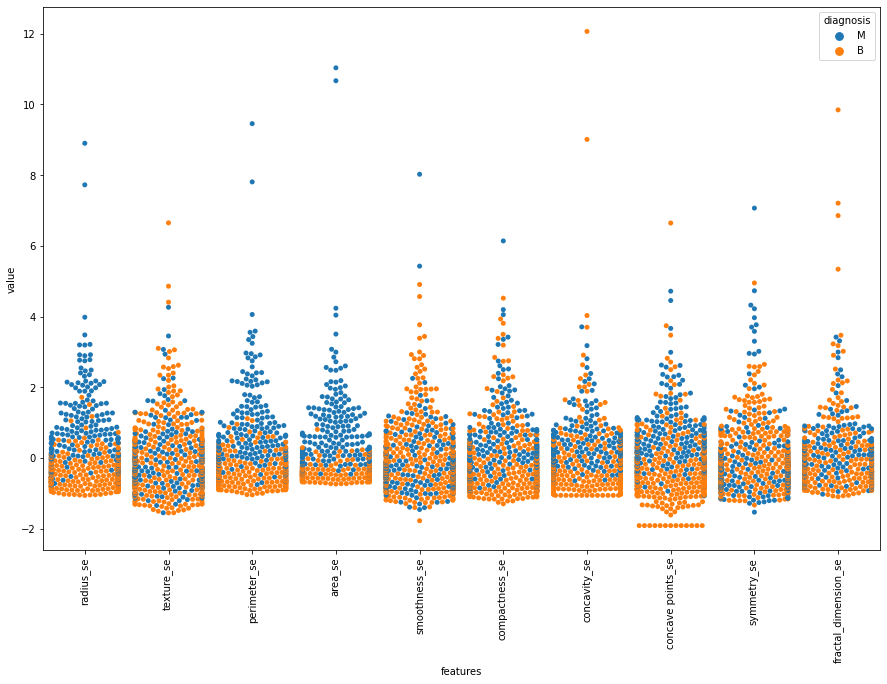

In [14]:
data = pd.concat([y, data_norm.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
_=sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
_=plt.xticks(rotation=90)

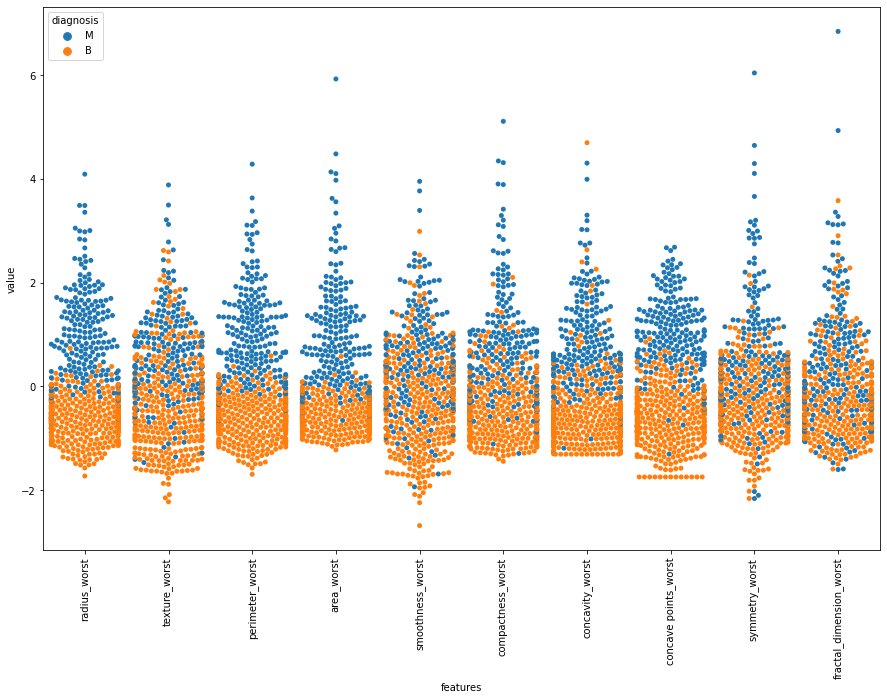

In [15]:
data = pd.concat([y, data_norm.iloc[:,20:32]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
_=sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
_=plt.xticks(rotation=90)

<AxesSubplot:>

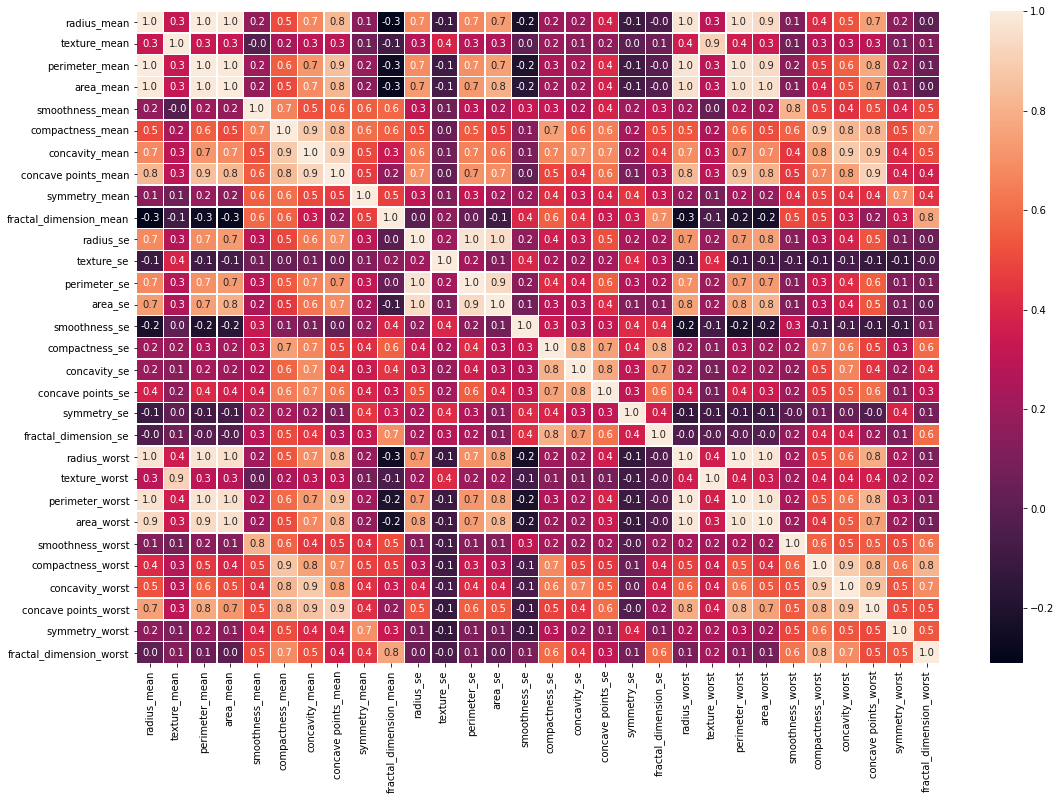

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(data_norm.corr(), annot=True, linewidths=.5, fmt= '.1f')